# Tree Ensembles
### Workshop 2 of DASIL's series on "Introduction to Machine Learning"
### Created by Martin Pollack, Yusen He, and Declan O'Reilly

In this Jupyter notebook we will teach you how to fit the machine learning models we talked about today in the lecture using the `scikit-learn` package in Python.

All of our example datasets come from the `datasets` sub-package within `scikit-learn`. So we import them now.

In [ ]:
from sklearn import datasets

## Supervised Learning - Classification

#### Dataset Introduction

Again, we will look at a classification problem, where the outcome can only take on 2 or more discrete values. But of course our predictors can be either continuous or discrete.

Now we use `scikit-learn`'s breast cancer dataset. Here the outcome can take on a 0, for no breast cancer, or 1, for breast cancer. 

So in this case we actually have a *binary classification* problem, meaning our category can only take on 2 discrete values. In most binary classification problems, like in this case, the categories are 0 and 1 indiciating the presence or absence of some trait.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)

In [ ]:
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

The `breast cancer` dataset contains 30 predictive variables. For example:



*    radius (mean of distances from center to points on the perimeter)

*    texture (standard deviation of gray-scale values)

*    perimeter

*    area

*    smoothness (local variation in radius lengths)

*    compactness (perimeter^2 / area - 1.0)

*    concavity (severity of concave portions of the contour)

*    concave points (number of concave portions of the contour)

*    symmetry

*    fractal dimension (“coastline approximation” - 1)



The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.



In [ ]:
breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Define the predictor variable set and a target


For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

#### Split the dataset into training and test set

We can use the `sklearn.model_selection.train_test_split()` function to do the random split for the training and testing dataset.

We just pass our input and output data, the proportion of the dataset that should go in the testing dataset, and here, `stratify` assures that the testing dataset has equal numbers of 0's and 1's in the outcome.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, stratify=Y,  random_state=0)

#### Random Forest for Binary Classification

The first ensemble model we will try is a random forest.

We start by importing the model we want.

Then, let's see what hyperparameters we have to consider when creating our random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier().get_params()

Let's now go ahead and fit a random forest!

Like on Tuesday, all we have to do is create the model object and then fit it with data. Remember, however, that the default hyperparameters are used.

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0)

classifier_rf.fit(X_train, Y_train)

Now that our `classifier_rfc` object has been created and fit, we can get information about our random forest model.

To see its accuracy, we can call the score method on the object and pass in data to use for the scoring. Below we calculate the accuracy for both the training and testing datasets.

In [ ]:
print("Accuracy for training dataset:")
print(classifier_rf.score(X_train, Y_train))
print("Accuracy for testing dataset:")
print(classifier_rf.score(X_test, Y_test))

These results seem fine, but we could get better results if we find better values for the hyperparameters, or if we "tune" the hyperparameters.

We now introduce one way to tune hyperparameters using `GridSearchCV`. We can list explicit values to try for each hyperparameter, and then scikit-learn will fit a model with each combination of hyperparameters. Using cross validation, we can then find the combination that delivers the best results and use that as our final model.

This process is shown below.

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_rf = RandomForestClassifier(random_state=0)
parameters = {'max_depth':[1, 2, 3, 5], 'min_impurity_decrease':[0, 0.01, 0.1, 0.2]}
classifier_rf_tuned_grid = GridSearchCV(tuned_rf, parameters)

classifier_rf_tuned_grid.fit(X_train, Y_train)

To see the best combination of hyperparameters, we can access the `best_estimator_` field of our fitted object `regressor_rf_tuned_grid`. 

Then, if we use our fit `GridSearchCV` object to calculate the score from data, the best model will be considered.

In [ ]:
print(classifier_rf_tuned_grid.best_params_)
print("Training R-squared:")
print(classifier_rf_tuned_grid.score(X_train, Y_train))
print("Testing R-squared:")
print(classifier_rf_tuned_grid.score(X_test, Y_test))

Similarly, if we use our object to predict the outcomes of new input data, the best model will be used to do this.

In [ ]:
rf_pred = classifier_rf_tuned_grid.predict(X_test)

#### XGBoost for Binary Classification

The next classification model we will try is XGBoost, considered one of the best models out there.

Again we start by seeing what hyperparameters we can possibly tune.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Now let's create a model with specific hyperparameters. We will name it as `classifier_XGB`.

Again, we start by creating the model object. Then we fit it. Then we can get the score both for the training and testing dataset.

Notice that the "score" of our model is the overall accuracy.

In [ ]:
classifier_XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0)

classifier_XGB.fit(X_train, Y_train)

print("Accuracy for training dataset:")
print(classifier_XGB.score(X_train, Y_train))
print("Accuracy for testing dataset:")
print(classifier_XGB.score(X_test, Y_test))

Accuracy for training dataset:
0.9949748743718593
Accuracy for testing dataset:
0.9590643274853801


But again we probably want to do some hyperparameter tuning.

The second main way to do this is `RandomizedSearchCV()`. Here we give distributions for our hyperparameters instead of specific values. Python will then randomly choose hyperparameters to try based on the given distributions.

For example, for XGBoost we will use a normal distribution with mean of 0.5 and standard deviation of 0.1 for the "minimum impurity decrease". This means we will mostly try values close to 0.5, but occasionally some further from 0.5. We will then consider a uniform distribution for learning rate between 0 and 1, meaning any number in this range is equally likely to be chosen. 

In [ ]:
XGB = GradientBoostingClassifier(n_estimators=100)

from scipy.stats import norm, uniform
distributions = {"min_impurity_decrease":norm(loc=0.5, scale=0.1), "learning_rate":uniform(loc=0.5, scale=0.5)}

from sklearn.model_selection import RandomizedSearchCV
classifier_XGB_tuned_random = RandomizedSearchCV(XGB, distributions, n_iter=10)

Now we fit our `RandomizedSearchCV` object. Since `n_iter` is 10 above, we will grab 10 combinations of hyperparameters from our two distributions. Then we will fit an XGBoost model for each combination, Python choosing the best one for us.

In [ ]:
classifier_XGB_tuned_random.fit(X_train, Y_train)
XGB_pred = classifier_XGB_tuned_random.predict(X_test)

print(classifier_XGB_tuned_random.best_params_)
print("Accuracy for training dataset:")
print(classifier_XGB_tuned_random.score(X_train, Y_train))
print("Accuracy for testing dataset:")
print(classifier_XGB_tuned_random.score(X_test, Y_test))

{'learning_rate': 0.6462933398888173, 'min_impurity_decrease': 0.5342229738705377}
Accuracy for training dataset:
0.9849246231155779
Accuracy for testing dataset:
0.9239766081871345


#### Further Performance Assessment using Testing Data

*   Confusion Matrix
*   Accuracy
*   Sensitivity
*   Specificity
*   AUC

Next we assess our Random Forest:

Confusion Matrix for XGB: 
 [[ 56   8]
 [  5 102]]


<AxesSubplot:>

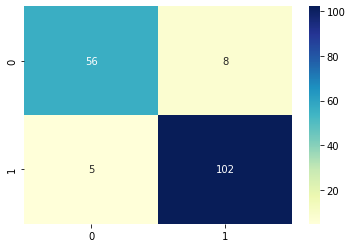

In [ ]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmRF = confusion_matrix(Y_test,rf_pred)
print('Confusion Matrix for rf: \n', cmRF)

#Plot the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cmRF, annot=True,fmt="d", cmap="YlGnBu")

In [ ]:
#Compute total test cases
totalRF=sum(sum(cmRF))
#####from confusion matrix calculate accuracy
accuracyRF=(cmRF[0,0]+cmRF[1,1])/totalRF
print ('Accuracy for Random Forest: ', accuracyRF)

sensitivityRF = cmRF[1,1]/(cmRF[1,0]+cmRF[1,1])
print('Specificity for Random Forest: ', sensitivityRF)

specificityRF = cmRF[0,0]/(cmRF[0,0]+cmRF[0,1])
print('Sensitivity for Random Forest: ', specificityRF)

Accuracy for XGB:  0.9239766081871345
Specificity for XGB:  0.9532710280373832
Sensitivity for XGB:  0.875


Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [ ]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the Random Forest classifier
RF_prob = classifier_rf_tuned_grid.predict_proba(X_test)

#We compute the AUC score
aucRF = roc_auc_score(Y_test,RF_prob[:,1])
print('AUC for Random Forest: ', aucRF)

AUC for XGB:  0.9763434579439252


Next we assess XGBoost:

Confusion Matrix for XGB: 
 [[ 56   8]
 [  5 102]]


<AxesSubplot:>

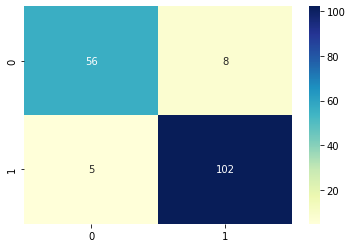

In [ ]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmXGB = confusion_matrix(Y_test,XGB_pred)
print('Confusion Matrix for XGB: \n', cmXGB)

#Plot the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cmXGB, annot=True,fmt="d", cmap="YlGnBu")

In [ ]:
#Compute total test cases
totalXGB=sum(sum(cmXGB))
#####from confusion matrix calculate accuracy
accuracyXGB=(cmXGB[0,0]+cmXGB[1,1])/totalXGB
print ('Accuracy for XGB: ', accuracyXGB)

sensitivityXGB = cmXGB[1,1]/(cmXGB[1,0]+cmXGB[1,1])
print('Specificity for XGB: ', sensitivityXGB)

specificityXGB = cmXGB[0,0]/(cmXGB[0,0]+cmXGB[0,1])
print('Sensitivity for XGB: ', specificityXGB)

Accuracy for XGB:  0.9239766081871345
Specificity for XGB:  0.9532710280373832
Sensitivity for XGB:  0.875


Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [ ]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the SVM classifier
XGB_prob = classifier_XGB_tuned_random.predict_proba(X_test)

#We compute the AUC score
aucXGB = roc_auc_score(Y_test,XGB_prob[:,1])
print('AUC for XGB: ', aucXGB)

AUC for XGB:  0.9763434579439252
